In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score


In [3]:
# Loaded the dataset into panda
df = pd.read_csv('ksdata.csv', low_memory=False)

# first four rows of the dataset
df.head()

,Kilometres,Miles
0,1,0.62
1,5,3.10
2,10,6.21
3,15,9.32
4,150,93.20


In [4]:
df.shape

(28, 2)

In [24]:
df.describe()

,Kilometres,Miles
count,28.000000,28.000000
mean,142.392857,88.475321
std,185.060018,114.990879
min,1.000000,0.620000
25%,22.750000,14.132500
50%,68.000000,42.250000
75%,181.250000,112.623500
max,800.000000,497.090000


<Axes: xlabel='Miles', ylabel='Kilometres'>

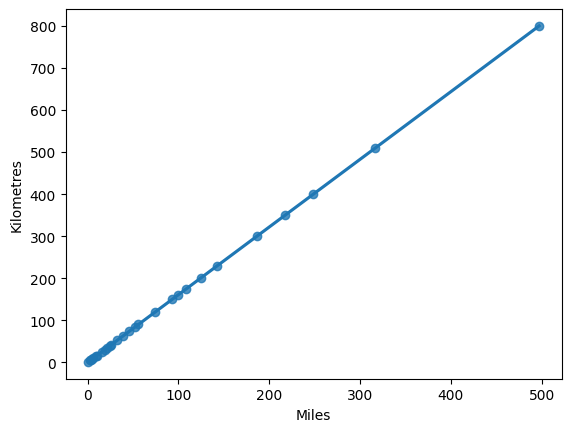

In [5]:
sns.regplot(x='Miles', y='Kilometres', data=df)

(0.0, 840.0)

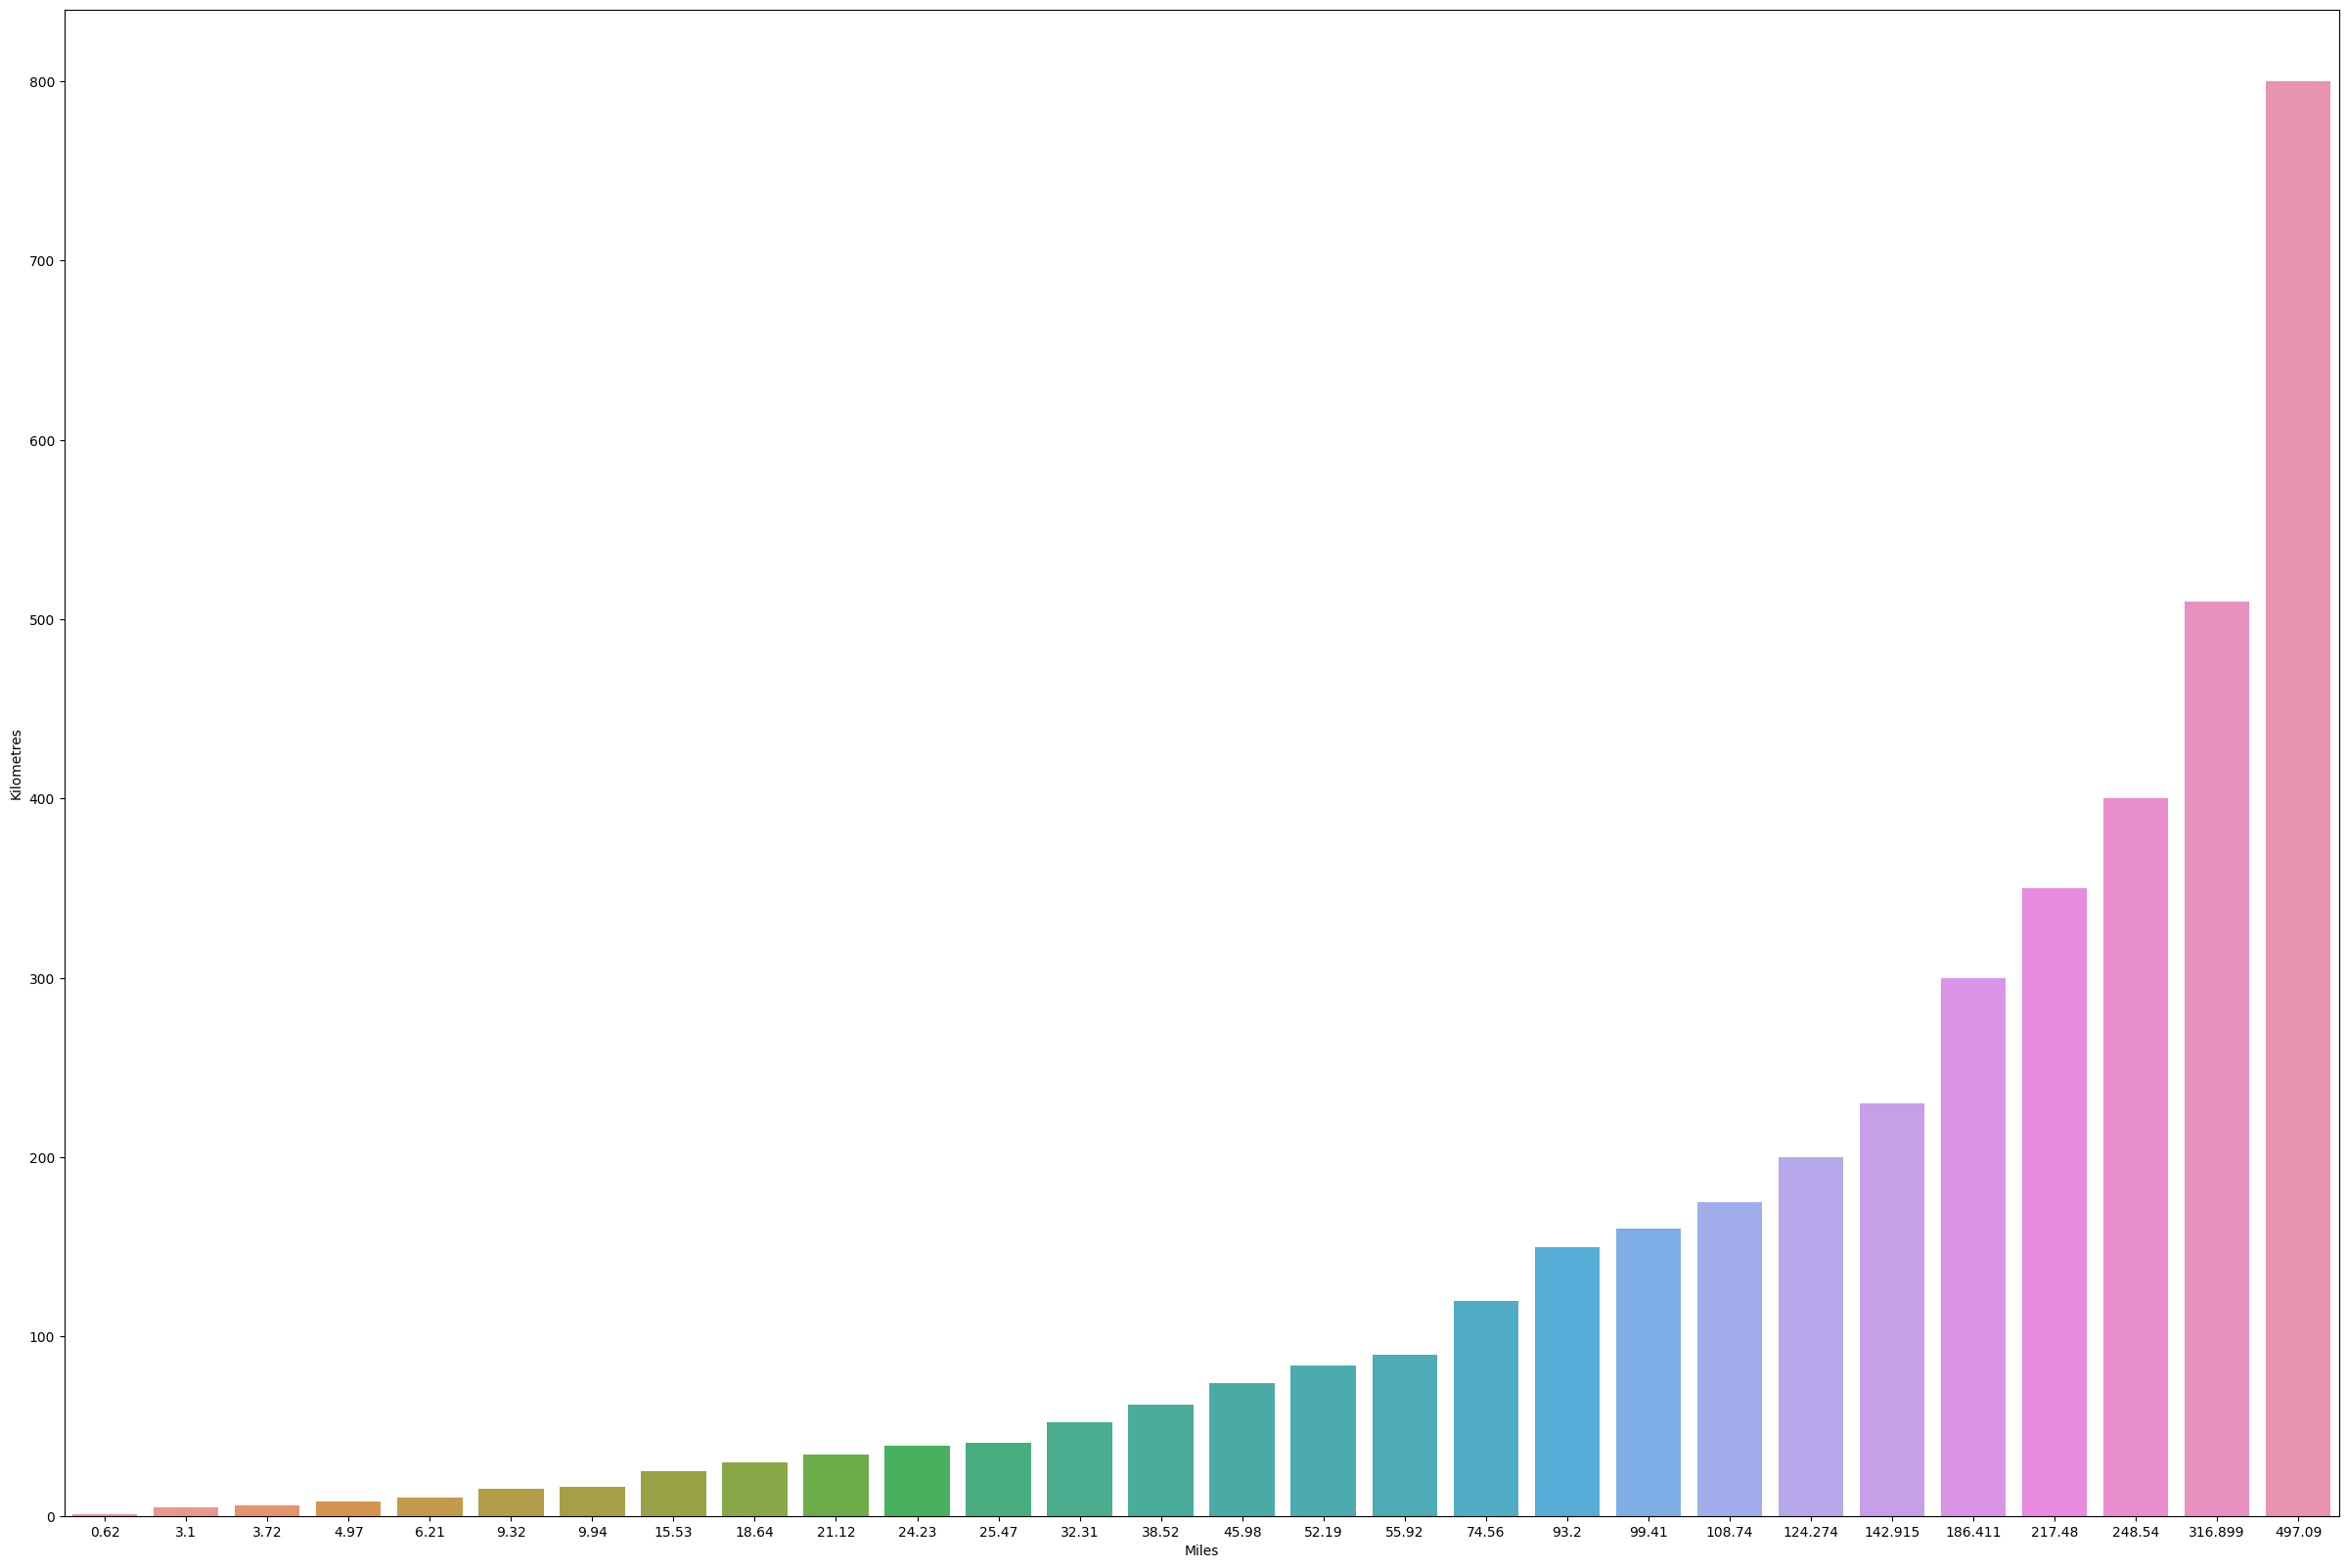

In [22]:
width = 30
height = 20
plt.figure(figsize=(width, height))
sns.barplot(x='Miles', y='Kilometres', data=df)
plt.ylim(0,)

In [16]:
x = df['Miles']
y = df['Kilometres']
pearson_coef, p_value = stats.pearsonr(x, y)
print("Pearson correlation coefficient:", pearson_coef)
print("p-value:", p_value)

Pearson correlation coefficient: 0.9999999996695947
p-value: 7.100334538540149e-121


In [32]:
lm = LinearRegression()
X = df['Miles'].values.reshape(-1,1)
y = df['Kilometres']
lm.fit(X,y)
Yhat = lm.predict(X)
Yhat[0:10]

array([  1.00331849,   4.99449455,   9.99955808,  15.00462161,
       149.99649586, 119.99830158,  30.00371875,  90.00010731,
        52.00346745, 799.99492325])

In [33]:
print('The coefficient of the data is: ',lm.coef_)
print('The intercept of the data is: ',lm.intercept_)

The coefficient of the data is:  [1.60934519]
The intercept of the data is:  0.005524475505779947


/tmp/ipykernel_109825/1818965526.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  axl = sns.distplot(df['Miles'], hist=False, color='r', label='Actual Value')
/tmp/ipykernel_109825/1818965526.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Yhat, hist=False, color='b', label='Fitted V

<Axes: xlabel='Miles', ylabel='Density'>

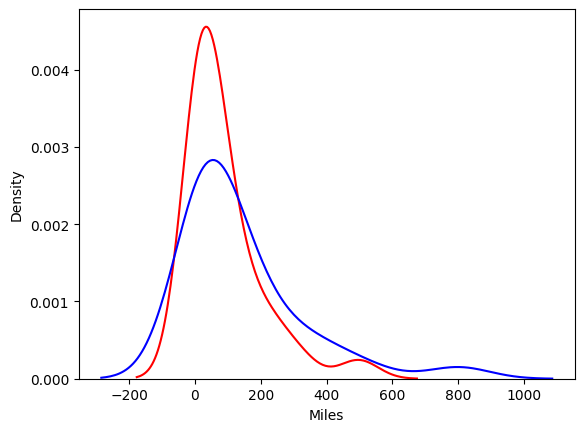

In [34]:
axl = sns.distplot(df['Miles'], hist=False, color='r', label='Actual Value')
sns.distplot(Yhat, hist=False, color='b', label='Fitted Values', ax=axl)